In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

In [133]:
df = pd.read_csv("crime.csv",encoding='latin1')

In [134]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [135]:
df.isnull().sum(axis = 0)

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

# Data cleaning

## SHOOTING

In [136]:
df.drop(['SHOOTING'],axis =1,inplace=True)

## DISTRICT

In [137]:
df['DISTRICT'].value_counts()

B2     49945
C11    42530
D4     41915
A1     35717
B3     35442
C6     23460
D14    20127
E13    17536
E18    17348
A7     13544
E5     13239
A15     6505
Name: DISTRICT, dtype: int64

In [138]:
df.dropna(subset=['DISTRICT'],inplace=True)

## UCR_PART

In [139]:
df.dropna(subset=['UCR_PART'],inplace=True)

## STREET

In [140]:
df.dropna(subset=['STREET'],inplace=True)

# LAT and LONG

We have the exact number of null lat and null long, so i think it may be the same entries, and we have no null location entries, so we can get the lat and the long from the location column.

Hypothesis: the entries, that have Lat and Long null values, are the same.

In [141]:
a = df[df['Lat'].isna()]['INCIDENT_NUMBER'].tolist()
b = df[df['Long'].isna()]['INCIDENT_NUMBER'].tolist()

In [142]:
a == b

True

The hypotheis is true.

In [143]:
aux = df[df['Lat'].isna()][['Lat','Long','Location']]

In [144]:
aux

,Lat,Long,Location
1075,NaN,NaN,"(0.00000000, 0.00000000)"
1089,NaN,NaN,"(0.00000000, 0.00000000)"
1090,NaN,NaN,"(0.00000000, 0.00000000)"
1091,NaN,NaN,"(0.00000000, 0.00000000)"
1094,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...
318999,NaN,NaN,"(0.00000000, 0.00000000)"
319014,NaN,NaN,"(0.00000000, 0.00000000)"
319042,NaN,NaN,"(0.00000000, 0.00000000)"
319059,NaN,NaN,"(0.00000000, 0.00000000)"


We don't have the location for that entries, so we'll drop that values.

In [146]:
df.dropna(subset=['Lat','Long'],inplace=True)

In [147]:
df.isnull().sum(axis = 0)

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

## Dropping unused columns

In [172]:
df.drop(['OFFENSE_CODE','OFFENSE_DESCRIPTION','OCCURRED_ON_DATE','UCR_PART'],axis =1,inplace=True)

# Data analysis

## District with most occurrences

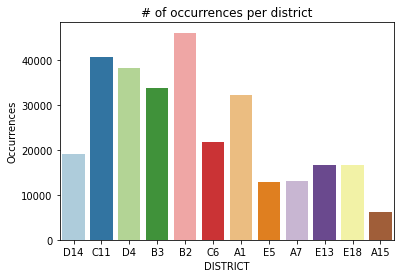

In [162]:
occurrencesDistrict = sns.countplot(x = df['DISTRICT'], palette='Paired')
occurrencesDistrict.set_title('# of occurrences per district')
occurrencesDistrict.set_ylabel("Occurrences")
plt.show()

## Day of week with most occurrences

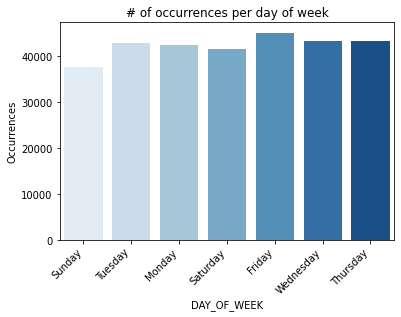

In [166]:
occurrencesDayOfWeek = sns.countplot(x = df['DAY_OF_WEEK'],palette='Blues')
occurrencesDayOfWeek.set_title('# of occurrences per day of week')
occurrencesDayOfWeek.set_ylabel("Occurrences")
occurrencesDayOfWeek.set_xticklabels(occurrencesDayOfWeek.get_xticklabels(),rotation = 45,horizontalalignment ='right' )
plt.show()

## OFFENSE_CODE_GROUP with most occurrences

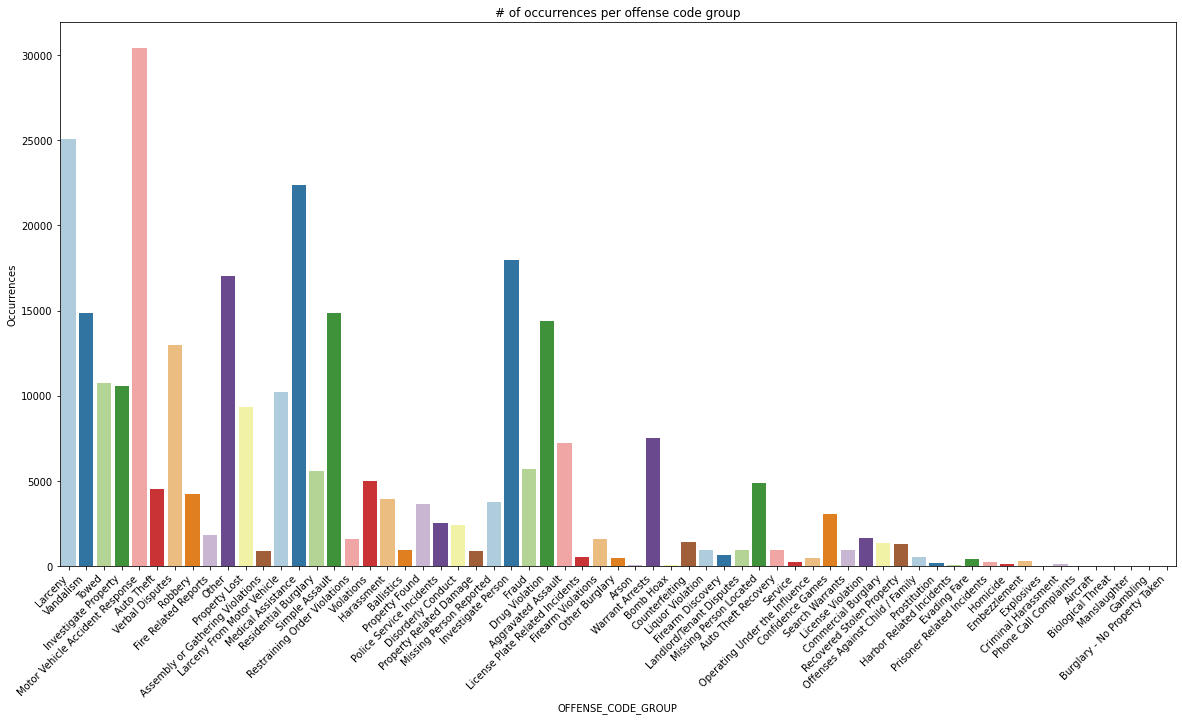

In [178]:
plt.figure(figsize=(20,10))
occurrencesOffenseCodeGroup = sns.countplot(x = df['OFFENSE_CODE_GROUP'],palette='Paired')
plt.figure
occurrencesOffenseCodeGroup.set_title('# of occurrences per offense code group')
occurrencesOffenseCodeGroup.set_ylabel("Occurrences")
occurrencesOffenseCodeGroup.set_xticklabels(occurrencesOffenseCodeGroup.get_xticklabels(),rotation = 45,horizontalalignment ='right' )
plt.show()

We have a few offense codes that correspond for a big number of the occorrences.

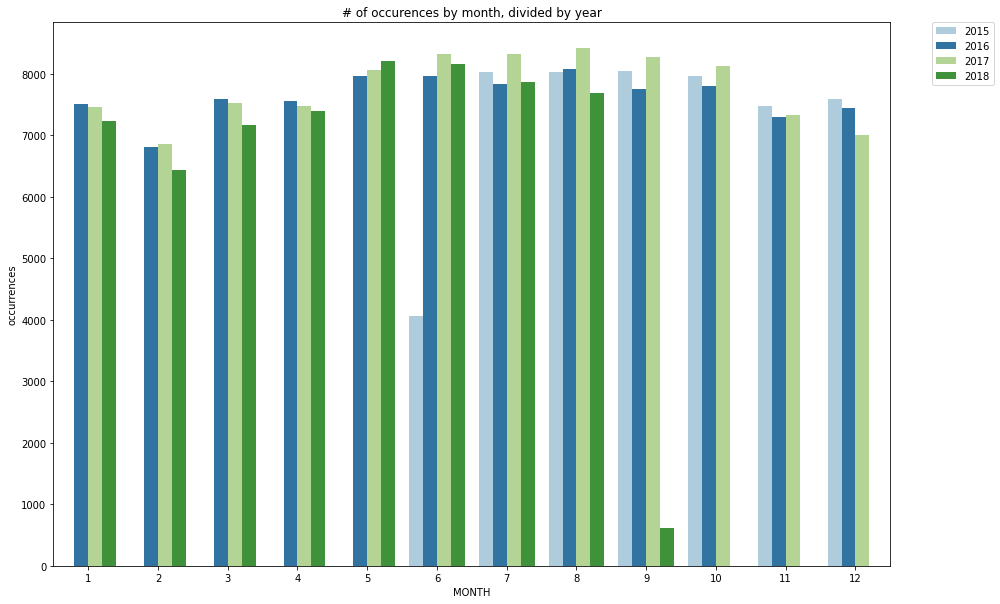

In [185]:
plt.figure(figsize=(15,10))
occurrencesMonthYear = sns.countplot(x = df['MONTH'],hue=df['YEAR'],palette='Paired')
occurrencesMonthYear.set_title('# of occurences by month, divided by year')
occurrencesMonthYear.set_ylabel("occurrences")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The number of occurrences by month is kind of consistent for the 4 years in the dataset, and we can see that we hve entries from june of 2015 to september of 2018.